In [64]:
#•In this project, I investigated data from the iOS App “Cookie Cats” 
#•An earlier version of the apps placed the final level at gate 30. 
#•But an updated version added 10 more gates, making the final gate 40.
#•This data contains players who tried the 30-gate and the 40-gate version. These gates are the 2 different A/B groups.
#•In this program, I did the following:
#    oCleaned the data
#    oSplit it into A/B groups based on gate
#    oPlotted and analyzed different variables based on gate A/B group.
#    oUsed the machine learning technique of bootstrapping in order to increase the accuracy of my analysis:
#        ♣Because I created 500 random samples, a large sample size, my findings are highly likely to be representative to populations of similar size. 
#        ♣This is, however, not necessarily a thorough test for statistical significance.
#    oPerformed another A/B test based on is_addicted, which I calculated based on whether the player’s sum 
#    of game rounds exceeded the median
#•Findings:
#    oThe simple bar graphs show that at a surface level, retention is roughly the same for both A/B groups 
#    for both 1 and 7 days after download.
#    oThe proportion of retention after 1 day (around 0.4) is much higher than after 7 days (around 0.2) 
#    for both A/B groups.
#    oBootstrap analysis indicates that the difference between both groups in 1-day retention, 7-day 
#    retention, and is_addicted is significant, favoring gate_30 results. 
#    oThis is because the probability that the difference between the gate groups is positive exceeds 95%. 
#    This is of course at the alpha=0.05 significance level.
#    oThe same probability for is_addicted also exceeds 95%.
#    oTherefore, it makes more sense that Cookie Cats keep the last gate at 30 since the marginal 
#    utility of continuing to play decreases sharply after that gate.


import pandas as pd
# Reading in the data
df = pd.read_csv("datasets/cookie_cats.csv")

# Converting True/False values to 1's and 0's
df['retention_1']=df['retention_1']*1
df['retention_7']=df['retention_7']*1
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
5,540,gate_40,187,1,1
6,1066,gate_30,0,0,0
7,1444,gate_40,2,0,0
8,1574,gate_40,108,1,1
9,1587,gate_40,153,1,0


In [65]:
# Data cleaning: Counting # of players in each AB group to check that they are grouped evenly.
# Purpose of splitting based on gate is to measure retention since advancing to future gates usually involves
# users paying money. Cookie Cats orignally ended at gate 30 but in an updated version added 10 more gates. So I found
# it interesting to measure the marignal amount users felt addicted to the game.

df.groupby(by="version")
print(len(df[df.version=='gate_30']))
print(len(df[df.version=='gate_40']))

44700
45489


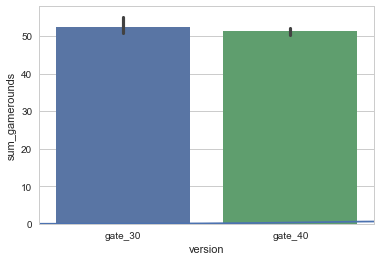

In [66]:
# Plot 1: Sum of Gamerounds vs Version
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="version", y="sum_gamerounds", data=df)
plt.show()

# Looks like people played more rounds of the game when the last level 
# was at gate 30. Perhaps gates 31-40 became repetitive in terms
# of difficulty or variety?

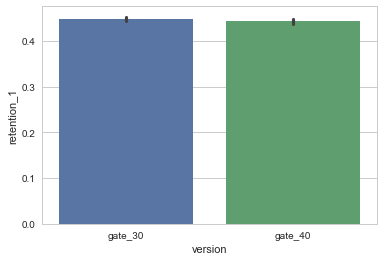

In [67]:
# Plot 2: 1-Day Retention vs Version: y-axis represents proprtion of players who continued to play

sns.set(style="whitegrid")
ax = sns.barplot(x="version", y="retention_1", data=df)
plt.show()

# Looks like the retention between the verisons is roughly the same

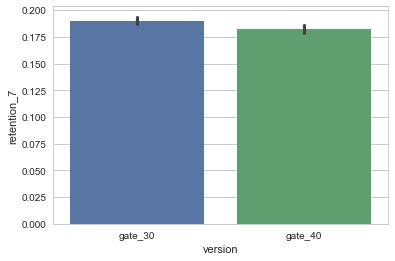

In [68]:
# Plot 3: 7-Day Retention vs Version: y-axis represents proprtion of players who continued to play

sns.set(style="whitegrid")
ax = sns.barplot(x="version", y="retention_7", data=df)
plt.show()
# Looks like the retention between the verisons is roughly the same, 
# albeit a bit larger. Looks like retention definitely decreases 
# after 1 week as opposed to 1 day.

In [69]:
# Total Proportion of Players who come back to play Cookie Cats 
# 1 day after donwloading it

prop_retention_1=df['retention_1'].sum()/df['retention_1'].count()
print(prop_retention_1)

0.445209504485


In [70]:
# Proportions by A/B group: Gate 30 vs Gate 40

prop_reten_1_groupby = df.groupby('version').sum()[['retention_1']]/df.groupby('version').count()[['retention_1']]

print(prop_reten_1_groupby)

         retention_1
version             
gate_30     0.448188
gate_40     0.442283


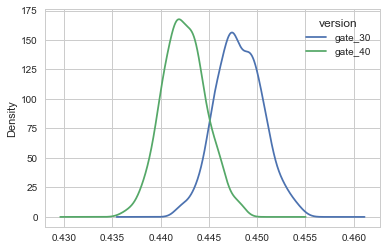

In [71]:
# Forming a list with bootstrapped means for AB-groups
import matplotlib.pyplot as plt
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Changing list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# Kernel Density Estimate plot of bootstrap distributions
boot_1d.plot(kind='kde')
plt.show()

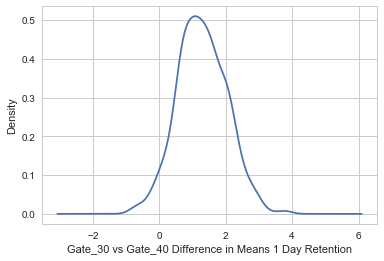

In [72]:
# Add a column that computes % difference between both AB-groups
boot_1d['diff'] = ((boot_1d['gate_30']-boot_1d['gate_40'])/boot_1d['gate_40'])*100

# Plot bootstrap % difference
ax = boot_1d['diff'].plot(kind='kde')
ax.set_xlabel('Gate_30 vs Gate_40 Difference in Means 1 Day Retention')
plt.show()


In [73]:
# Calculate probability that 1-day retention > for gate @ level 30
prob = (boot_1d['diff']>0).sum()/boot_1d['diff'].count()

print('{0:.2f}'.format(prob*100))

96.00


In [74]:
# Calculating 7-day retention for both AB-groups

prop_reten_7_groupby = df.groupby('version').sum()[['retention_7']]/df.groupby('version').count()[['retention_7']]

print(prop_reten_7_groupby)

         retention_7
version             
gate_30     0.190201
gate_40     0.182000


In [75]:

boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    

boot_7d = pd.DataFrame(boot_7d)

boot_7d['diff'] = ((boot_7d['gate_30']-boot_7d['gate_40'])/boot_7d['gate_40'])*100


ax = boot_7d['diff'].plot(kind='kde')
ax.set_xlabel("Gate_30 vs Gate_40 Difference in Means 7 Day Retention")


prob = (boot_7d['diff']>0).sum()/boot_7d['diff'].count()

print('{0:.2f}'.format(prob*100))

100.00


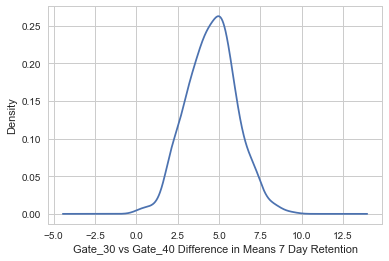

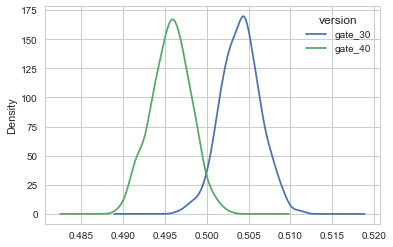

In [76]:


# I made a threshold for game rounds to conduct another A/B test by placing players into 2 different categories
# based on number of gamerounds they played (is independent of how many gate they advanced).
# I found the median and grouped players into 'addicted' or 'not addicted' and the performed bootstrapping on it.

df['sum_gamerounds'].min()

df['is_addicted'] = df['sum_gamerounds']>df['sum_gamerounds'].median()

boot_addict = []
for i in range(1000):
    boot_addict_mean = df.sample(frac=1, replace=True).groupby('version')['is_addicted'].mean()
    boot_addict.append(boot_addict_mean)
    

boot_addict = pd.DataFrame(boot_addict)
boot_addict.plot(kind='kde')
plt.show()

In [77]:

boot_addict['diff'] = ((boot_addict['gate_30']-boot_addict['gate_40'])/boot_addict['gate_40'])*100


ax = boot_addict['diff'].plot(kind='kde')
ax.set_xlabel('Gate_30 vs Gate_40 Difference in Addiction Level')

prob = (boot_addict['diff']>0).sum()/boot_addict['diff'].count()

print('{0:.2f}'.format(prob*100))# Looks like the retention between the verisons is roughly the same

99.50


In [78]:
# Should Cookie Cats move the gate from level 30 to level 40?
move_to_level_40 = False 